In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import random

In [2]:
file_list = [file for file in os.listdir() if file.endswith('csv')]

# 모든 파일을 불러온다.

In [3]:
file_list

['wine_quality_red.csv',
 'wine_area_province.csv',
 'wine-data_dictionary.csv',
 'wine_area_grade.csv',
 'wine_side.csv',
 'wine_data_preference.csv',
 'wine_raw_data_group.csv',
 'wine_data_sales.csv',
 'wine_frequency.csv',
 'wine_quality_white.csv']

In [4]:
PREF = file_list.index('wine_data_preference.csv')
QLT_R = file_list.index('wine_quality_red.csv')
QLT_W = file_list.index('wine_quality_white.csv')
FREQ = file_list.index('wine_frequency.csv')
SALES = file_list.index('wine_data_sales.csv')
SIDE = file_list.index('wine_side.csv')

In [5]:
AREA = file_list.index('wine_area_province.csv')

In [6]:
df_list = list()
for file in file_list:
    try: df = pd.read_csv(file)
    except: df = pd.read_csv(file, encoding = 'cp949')
    df_list.append(df)

# 각 파일에 대해서 데이터가 몇 개인지, unique한 데이터가 몇 개인지, 결측치가 몇 개인지 확인해본다.

In [7]:
for idx, df in enumerate(df_list):
    print('='*40 + file_list[idx] + '='*40)
    print(f'{file_list[idx]} has {len(df)} entries...')
    print('-'*80)
    for category in df:
        print(f'{category} column\'s unique values: {df[category].unique()}\n{category} column\'s number of unique values: {len(df[category].unique())} values\n{category}\'s number of null values: {len(df[df[category].isnull() == True])}')
        print('-'*90)
    print('='*90)

========================================wine_quality_red.csv========================================
wine_quality_red.csv has 1599 entries...
--------------------------------------------------------------------------------
fixed acidity column's unique values: [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
fixed acidity column's number of unique values: 96 values
fixed acidity's number of null values: 0
------------------------------------------------------------------------------------------
volatile acidity column's unique values: [0.7   0.88  0.76  0.

province column's unique values: ['충청도' '서울시' '부산시' '경상도' '전라도' '경기도']
province column's number of unique values: 6 values
province's number of null values: 0
------------------------------------------------------------------------------------------
city column's unique values: ['청주시' '양천구' '연제구' '거제시' '광양시' '함안군' '강남구' '가평군' '해운대구' '포천시' '포항시 북구'
 '포항시 남구' '사하구' '강동구' '화성시' '곡성군' '기장군' '하동군' '해남군' '홍성군' '강북구' '평택시'
 '천안시' '안양시' '진구' '구례군' '마포구' '익산시' '충주시' '진천군']
city column's number of unique values: 30 values
city's number of null values: 0
------------------------------------------------------------------------------------------
purchase column's unique values: ["['D', 'F', 'D', 'G']" "['C', 'G', 'E']" "['B', 'F']" ...
 "['H', 'B', 'G', 'H', 'C']" "['H', 'H', 'H', 'D', 'F']"
 "['C', 'F', 'C', 'H', 'B']"]
purchase column's number of unique values: 10951 values
purchase's number of null values: 0
----------------------------------------------------------------------------------------

# PREFERENCE를 먼저 전처리 한다

In [8]:
df_tmp = df_list[PREF].copy()

# null value가 17개 있는 SEQ을 먼저 정제한다.

In [9]:
df_list[PREF][df_list[PREF].isnull()['seq'] == True]

,seq,gender,age,job,marital,province,city,choice
289,NaN,FEMALE,40대,교수,SINGLE,부산시,해운대구,G
535,NaN,FEMALE,40대,자영업,MARREID,부산시,사하구,D
2324,NaN,FEMALE,50대,벤처직원,SINGLE,부산시,해운대구,D
3113,NaN,FEMALE,40대,자영업,MARREID,서울시,강남구,G
3151,NaN,FEMALE,40대,자영업,MARREID,부산시,연제구,D
3419,NaN,MALE,50대,벤처직원,MARREID,충청도,청주시,A
4731,NaN,FEMALE,40대,임시직,SINGLE,경상도,포항시 남구,A
4822,NaN,MALE,20대,학생,SINGLE,서울시,양천구,G
4884,NaN,MALE,30대,교수,MARREID,부산시,진구,E
5553,NaN,MALE,50대,임시직,MARREID,경기도,포천시,A


# SEQ는 해당 인덱스 + 1과 같으므로, 인덱스에 1을 더한 값으로 결측치를 대체한다.

In [10]:
seq_idx = df_tmp.index.to_series()
seq_idx = seq_idx + 1

In [11]:
df_tmp['seq'].fillna(seq_idx, inplace = True)
df_tmp.loc[285:300]

,seq,gender,age,job,marital,province,city,choice
285,286.0,FEMALE,30대,회사직원,MARREID,충청도,홍성군,E
286,287.0,FEMALE,30대,기자,MARREID,충청도,청주시,C
287,288.0,FEMALE,40대,벤처직원,SINGLE,부산시,해운대구,D
288,289.0,FEMALE,30대,기자,MARREID,서울시,양천구,B
289,290.0,FEMALE,40대,교수,SINGLE,부산시,해운대구,G
290,291.0,FEMALE,30대,임시직,MARREID,부산시,연제구,H
291,292.0,FEMALE,20대,임시직,SINGLE,전라도,익산시,F
292,293.0,FEMALE,40대,중소기업직원,MARREID,충청도,청주시,H
293,294.0,MALE,40대,임시직,MARREID,경기도,화성시,E
294,295.0,MALE,20대,자영업,SINGLE,경기도,화성시,F


In [12]:
df_tmp['seq'] = pd.Series(map(int, df_tmp['seq']))

In [13]:
df_tmp.head()

,seq,gender,age,job,marital,province,city,choice
0,1,MALE,50대,중소기업직원,MARREID,부산시,해운대구,A
1,2,FEMALE,30대,연구원,SINGLE,경상도,하동군,D
2,3,FEMALE,30대,자영업,MARREID,부산시,사하구,B
3,4,FEMALE,40대,자영업,MARREID,부산시,사하구,D
4,5,FEMALE,40대,의사,MARREID,서울시,강남구,C


# SEQ feature 정제 완료

In [14]:
test = pd.concat([df_tmp, df_list[FREQ], df_list[SIDE]], axis = 1, sort = True)
test.columns

Index(['seq', 'gender', 'age', 'job', 'marital', 'province', 'city', 'choice',
       'seq', 'prefer', 'frequency', 'wineFrequency', 'seq', 'side',
       'choice1'],
      dtype='object')

In [15]:
qq = test['seq']
test.drop('seq', axis = 1, inplace = True)
test.columns

Index(['gender', 'age', 'job', 'marital', 'province', 'city', 'choice',
       'prefer', 'frequency', 'wineFrequency', 'side', 'choice1'],
      dtype='object')

In [16]:
qq = qq.iloc[:, 0]

In [17]:
test['seq'] = qq
test.head()

,gender,age,job,marital,province,city,choice,prefer,frequency,wineFrequency,side,choice1,seq
0,MALE,50대,중소기업직원,MARREID,부산시,해운대구,A,당도,5,4,Annon,A,1
1,FEMALE,30대,연구원,SINGLE,경상도,하동군,D,깊이감,2,1,Roquefort,B,2
2,FEMALE,30대,자영업,MARREID,부산시,사하구,B,깊이감,4,1,Cheddar,G,3
3,FEMALE,40대,자영업,MARREID,부산시,사하구,D,당도,1,1,Gorgonzola,B,4
4,FEMALE,40대,의사,MARREID,서울시,강남구,C,깊이감,1,1,Gorgonzola,C,5


# 중복되는 데이터 (eg. SEQ)가 존재하고 총 entry의 갯수가 같은 세 DB (PREFERENCE, SIDE, FREQUENCY)를 하나로 합쳐준다

In [18]:
df_tmp = test

In [19]:
df_tmp['marital'].unique()

array(['MARREID', 'SINGLE', nan, 'UNKNOWN'], dtype=object)

In [20]:
tmp1 = pd.concat([df_tmp[df_tmp['marital'] == 'UNKNOWN'], df_tmp[df_tmp.isnull()['marital'] == True]])
tmp2 = df_tmp[df_tmp['marital'] == 'MARREID']
tmp2 = pd.concat([tmp2, df_tmp[df_tmp['marital'] == 'SINGLE']])

# 나이에 따른 결혼 비율로 각 연령대별 비율별 분포로 대체하기!!!!!!!
# random.seed = 664
# data set to_csv

In [21]:
MARRIED = (len(tmp2[tmp2['marital'] == 'MARREID'])/len(tmp2))
SINGLE = 1 - MARRIED

qq = np.random.choice(['MARREID', 'SINGLE'], len(tmp1), p=(MARRIED, SINGLE))
qq = pd.Series(qq, index = tmp1.index)
tmp1['marital'] = qq
tmp1.head()

,gender,age,job,marital,province,city,choice,prefer,frequency,wineFrequency,side,choice1,seq
1467,FEMALE,40대,변호사,MARREID,충청도,청주시,D,깊이감,3,2,Valencay,B,1468
1972,FEMALE,20대,회사직원,SINGLE,서울시,강남구,G,당도,2,1,Ricotta,B,1973
2413,FEMALE,50대,기자,SINGLE,부산시,연제구,C,당도,3,2,Cheddar,D,2414
2566,MALE,40대,변호사,MARREID,충청도,천안시,F,깊이감,3,2,Valencay,E,2567
2926,MALE,30대,자영업,MARREID,부산시,해운대구,D,깊이감,1,1,Brie,F,2927


In [22]:
df_tmp = pd.concat([tmp1, tmp2])
df_tmp.sort_index(inplace=True)
df_tmp.head()

,gender,age,job,marital,province,city,choice,prefer,frequency,wineFrequency,side,choice1,seq
0,MALE,50대,중소기업직원,MARREID,부산시,해운대구,A,당도,5,4,Annon,A,1
1,FEMALE,30대,연구원,SINGLE,경상도,하동군,D,깊이감,2,1,Roquefort,B,2
2,FEMALE,30대,자영업,MARREID,부산시,사하구,B,깊이감,4,1,Cheddar,G,3
3,FEMALE,40대,자영업,MARREID,부산시,사하구,D,당도,1,1,Gorgonzola,B,4
4,FEMALE,40대,의사,MARREID,서울시,강남구,C,깊이감,1,1,Gorgonzola,C,5


# 결혼 여부 결측치, 이상치를 기존 데이터의 비율로 채워준다.

In [23]:
for idx in df_tmp.index:
    if df_tmp.loc[idx, 'frequency'] < df_tmp.loc[idx, 'wineFrequency']:
        df_tmp.loc[idx, 'frequency'], df_tmp.loc[idx, 'wineFrequency'] = df_tmp.loc[idx, 'wineFrequency'], df_tmp.loc[idx, 'frequency']

In [24]:
cheese_dict = dict()
for cheese in df_tmp[df_tmp.isnull()['side'] == False]['side'].unique():
    cheese_dict[cheese] = (len(df_tmp[df_tmp.isnull()['side'] == False]) -len(df_tmp[df_tmp['side'] == cheese]))/len(df_tmp[df_tmp.isnull()['side'] == False])

tmp_val = list(cheese_dict.values())
tmp_val = list(map((lambda x:x/sum(tmp_val)), tmp_val))
    
for idx, key in enumerate(cheese_dict.keys()):
    cheese_dict[key] = tmp_val[idx]
    
cheese_dict

{'Annon': 0.12515090543259558,
 'Roquefort': 0.12466225926990515,
 'Cheddar': 0.12540960045990227,
 'Gorgonzola': 0.12515090543259558,
 'Camenbert': 0.12535211267605634,
 'Brie': 0.1253089968381719,
 'Valencay': 0.12490658235125036,
 'Ricotta': 0.12405863753952286}

In [25]:
val = np.random.choice(list(cheese_dict.keys()), len(df_tmp[df_tmp.isnull()['side'] == True]), p=list(cheese_dict.values()))
val = pd.Series(val, index=df_tmp[df_tmp.isnull()['side'] == True].index)
for idx in df_tmp[df_tmp.isnull()['side'] == True].index:
    df_tmp.loc[idx, 'side'] = val[idx]
df_tmp[df_tmp.isnull()['side'] == True]

,gender,age,job,marital,province,city,choice,prefer,frequency,wineFrequency,side,choice1,seq


# 시음회에서 치즈는 '랜덤하게 주어졌다'고 설정되어 있으므로, 응답수가 적은 치즈의 비율을 더 높이, 응답수가 많은 치즈는 더 낮게 비율을 설정하여 정제하였을 때, 최대한 비슷한 값을 가지도록 했다.

In [26]:
tmp1 = df_tmp[df_tmp.isnull()['gender'] == True]
tmp1 = pd.concat([tmp1, df_tmp[df_tmp['gender'] == 'UNKNOW']])
tmp2 = df_tmp[(df_tmp['gender'] == 'MALE') | (df_tmp['gender'] == 'FEMALE')]

In [27]:
MALE_RATIO = len(tmp2[tmp2['gender'] == 'MALE'])/len(tmp2)
FEMALE_RATIO = 1 - MALE_RATIO

In [28]:
val = np.random.choice(['MALE', 'FEMALE'], len(tmp1), p=(MALE_RATIO, FEMALE_RATIO))
tmp1['gender'] = pd.Series(val, index=tmp1.index)
df_tmp = pd.concat([tmp1, tmp2])
df_tmp.sort_index(inplace = True)
df_tmp

,gender,age,job,marital,province,city,choice,prefer,frequency,wineFrequency,side,choice1,seq
0,MALE,50대,중소기업직원,MARREID,부산시,해운대구,A,당도,5,4,Annon,A,1
1,FEMALE,30대,연구원,SINGLE,경상도,하동군,D,깊이감,2,1,Roquefort,B,2
2,FEMALE,30대,자영업,MARREID,부산시,사하구,B,깊이감,4,1,Cheddar,G,3
3,FEMALE,40대,자영업,MARREID,부산시,사하구,D,당도,1,1,Gorgonzola,B,4
4,FEMALE,40대,의사,MARREID,서울시,강남구,C,깊이감,1,1,Gorgonzola,C,5
5,MALE,50대,회사직원,SINGLE,부산시,사하구,G,깊이감,3,2,Camenbert,C,6
6,MALE,30대,임시직,MARREID,서울시,강남구,H,당도,1,1,Annon,F,7
7,FEMALE,60대 이상,임시직,SINGLE,서울시,강남구,C,깊이감,3,2,Annon,H,8
8,MALE,20대,학생,MARREID,부산시,해운대구,D,깊이감,2,1,Brie,A,9
9,FEMALE,50대,임시직,MARREID,경기도,포천시,D,당도,1,1,Valencay,B,10


# 남녀 비율은 직업에서 인사이트를 얻을 수 있지 않을까 생각해봤지만, 와인이라는 품목 자체가 생필품과 같은 일반적인 품목이 아니기에 기존 데이터의 남녀 비율과 같은 비율로 랜덤 데이터가 뿌려지도록 했다. 
# 비슷한 예로 편의점에 맥주를 사는 고객이 90%라면 결측치 역시 남성 90%로 맞추는 것을 들 수 있다.

In [29]:
area_dict = dict()
for column in df_list[AREA].columns:
    if ':' in column: continue
    a = list(map((lambda x: x[1:-1]), df_list[AREA][column][0][1:-1].split(', ')))
    area_dict[column] = a

area_dict

{'서울시': ['강남구', '양천구', '마포구', '강북구', '강동구'],
 '부산시': ['사하구', '해운대구', '기장군', '연제구', '진구'],
 '경기도': ['포천시', '화성시', '평택시', ' 가평군', '안양시'],
 '충청도': ['청주시', '충주시', '천안시', '홍성군', '진천군'],
 '경상도': ['함안군', '하동군', '포항시 남구', '포항시 북구', '거제시'],
 '전라도': ['광양시', '해남군', '익산시', '곡성군', '구례군']}

In [30]:
for key, val in area_dict.items():
    print(val)

['강남구', '양천구', '마포구', '강북구', '강동구']
['사하구', '해운대구', '기장군', '연제구', '진구']
['포천시', '화성시', '평택시', ' 가평군', '안양시']
['청주시', '충주시', '천안시', '홍성군', '진천군']
['함안군', '하동군', '포항시 남구', '포항시 북구', '거제시']
['광양시', '해남군', '익산시', '곡성군', '구례군']


In [31]:
for idx in df_tmp[df_tmp.isnull()['province'] == True].index:
    for key, val in area_dict.items():
        if df_tmp.loc[idx, 'city'] in val:
            df_tmp.loc[idx, 'province'] = key
            break

In [32]:
df_tmp[df_tmp.isnull()['province'] == True]

,gender,age,job,marital,province,city,choice,prefer,frequency,wineFrequency,side,choice1,seq


# 지역의 경우 도시 지명에서 확실한 데이터를 얻어서 모두 정제할 수 있었다.

# 메일의 등급표는 각 물리적 주소가 아닌 각 주소를 군집으로 나누었을 때의 등급이므로 기존의 주소도 유지하면서 새로운 변수 'area_grade'를 만들 것임

In [33]:
df_area_grade = pd.read_csv('wine_area_grade.csv', encoding='cp949')
df_area_grade

,Unnamed: 0,Cities
0,1급지,"['강남구', '양천구', '기장군', '해운대구', '청주시']"
1,2급지,"['포천시', '화성시', '포항시 남구', '강동구', '사하구']"
2,3급지,"['강북구', '평택시', '가평군', '안양시', '포항시 북구']"
3,4급지,"['광양시', '해남군', '연제구', '천안시', '마포구']"
4,5급지,"['하동군', '함안군', '거제시', '진구', '홍성군']"
5,6급지,"['충주시', '익산시', '구례군', '곡성군', '진천군']"


In [34]:
df_area_grade.iloc[0, 0]

'1급지'

In [35]:
area_grade = dict()
for idx in df_area_grade.index:
    area_grade[df_area_grade.iloc[idx, 0]] = df_area_grade.iloc[idx, 1][2:-2].split("', '")
area_grade

{'1급지': ['강남구', '양천구', '기장군', '해운대구', '청주시'],
 '2급지': ['포천시', '화성시', '포항시 남구', '강동구', '사하구'],
 '3급지': ['강북구', '평택시', '가평군', '안양시', '포항시 북구'],
 '4급지': ['광양시', '해남군', '연제구', '천안시', '마포구'],
 '5급지': ['하동군', '함안군', '거제시', '진구', '홍성군'],
 '6급지': ['충주시', '익산시', '구례군', '곡성군', '진천군']}

In [36]:
area = list()
for idx in df_tmp.index:
    for key, area_data in area_grade.items():
        if df_tmp.loc[idx, 'city'] in area_data:
            area.append(key)
            break
area = pd.Series(area, index=df_tmp.index)
df_tmp['area_grade'] = area

In [37]:
df_tmp_nage = df_tmp.copy()
df_tmp_nage = df_tmp_nage[df_tmp_nage['age'] != '미상']
df_tmp_nage = df_tmp_nage[df_tmp_nage.isnull()['age'] == False]

print(len(df_tmp_nage))
# df_tmp_nage 데이터셋은 결측치를 제외한 데이터 셋

9993


In [38]:
for column in df_tmp.columns:
    print('='*80)
    print(f'{column} column\'s unique values: {df_tmp[column].unique()}\n{column} column\'s number of unique values: {len(df_tmp[column].unique())} values\n{column}\'s number of null values: {len(df_tmp[df_tmp[column].isnull() == True])}')
    print('='*80)

gender column's unique values: ['MALE' 'FEMALE']
gender column's number of unique values: 2 values
gender's number of null values: 0
age column's unique values: ['50대' '30대' '40대' '60대 이상' '20대' '미상']
age column's number of unique values: 6 values
age's number of null values: 0
job column's unique values: ['중소기업직원' '연구원' '자영업' '의사' '회사직원' '임시직' '학생' '벤처직원' '기자' '공무원' '변호사' '교수'
 '미상']
job column's number of unique values: 13 values
job's number of null values: 0
marital column's unique values: ['MARREID' 'SINGLE']
marital column's number of unique values: 2 values
marital's number of null values: 0
province column's unique values: ['부산시' '경상도' '서울시' '경기도' '충청도' '전라도']
province column's number of unique values: 6 values
province's number of null values: 0
city column's unique values: ['해운대구' '하동군' '사하구' '강남구' '포천시' '거제시' '강북구' '청주시' '양천구' '해남군' '곡성군' '진구'
 '함안군' '광양시' '안양시' '홍성군' '포항시 남구' '천안시' '기장군' '익산시' '평택시' '화성시' '마포구'
 '강동구' '구례군' '포항시 북구' '연제구' '가평군' '진천군' '충주시']
city column's nu

# 나이에 대한 결측치를 처리하기 위해서 각 직업의 평균 나이를 통계 자료 (인터넷 조사)를 통해 입수한다. 이후에도 쓰일 일이 있을지 몰라서, 나중에도 편히 사용하기 위해 딕셔너리 변수로 만들어주었다.

In [39]:
job_age = dict()
for job in df_tmp['job'].unique():
    job_age[job] = 0

job_age.items()

dict_items([('중소기업직원', 0), ('연구원', 0), ('자영업', 0), ('의사', 0), ('회사직원', 0), ('임시직', 0), ('학생', 0), ('벤처직원', 0), ('기자', 0), ('공무원', 0), ('변호사', 0), ('교수', 0), ('미상', 0)])

In [40]:
job_age['중소기업직원'] = '40대'
#40.0 이데일리 2011 자료
job_age['자영업'] = '50대'
#54.7 조선비즈 2018
job_age['연구원'] = '30대'
job_age['의사'] = '40대'
job_age['임시직'] = '40대'
job_age['학생'] = '20대'
job_age['벤처직원'] = '30대'
job_age['기자'] = '30대'
job_age['공무원'] = '40대'
job_age['변호사'] = '50대'
job_age['교수'] = '50대'
job_age['미상'] = '40대'
job_age['회사직원'] = '40대'
# 현대경제연구원

In [41]:
df_tmp['age'].unique()

array(['50대', '30대', '40대', '60대 이상', '20대', '미상'], dtype=object)

In [42]:
df_tmp[df_tmp['age'] == '미상']

,gender,age,job,marital,province,city,choice,prefer,frequency,wineFrequency,side,choice1,seq,area_grade
138,MALE,미상,임시직,MARREID,경상도,하동군,H,깊이감,3,2,Valencay,F,139,5급지
624,FEMALE,미상,자영업,SINGLE,경기도,화성시,G,당도,2,1,Annon,A,625,2급지
3555,FEMALE,미상,회사직원,MARREID,전라도,곡성군,B,깊이감,2,1,Brie,B,3556,6급지
3809,FEMALE,미상,회사직원,MARREID,부산시,해운대구,B,깊이감,3,1,Brie,B,3810,1급지
6215,MALE,미상,벤처직원,MARREID,서울시,양천구,B,깊이감,3,1,Valencay,C,6216,1급지
7501,FEMALE,미상,회사직원,MARREID,충청도,청주시,B,깊이감,2,1,Brie,C,7502,1급지
9263,FEMALE,미상,기자,MARREID,서울시,양천구,H,당도,2,1,Brie,H,9264,1급지


In [43]:
df_tmp['choice2'] = df_tmp['choice1']
df_tmp['choice1'] = df_tmp['choice']
df_tmp.drop('choice', axis = 1, inplace = True)

df_tmp.head()

,gender,age,job,marital,province,city,prefer,frequency,wineFrequency,side,choice1,seq,area_grade,choice2
0,MALE,50대,중소기업직원,MARREID,부산시,해운대구,당도,5,4,Annon,A,1,1급지,A
1,FEMALE,30대,연구원,SINGLE,경상도,하동군,깊이감,2,1,Roquefort,D,2,5급지,B
2,FEMALE,30대,자영업,MARREID,부산시,사하구,깊이감,4,1,Cheddar,B,3,2급지,G
3,FEMALE,40대,자영업,MARREID,부산시,사하구,당도,1,1,Gorgonzola,D,4,2급지,B
4,FEMALE,40대,의사,MARREID,서울시,강남구,깊이감,1,1,Gorgonzola,C,5,1급지,C


In [44]:
df_tmp_job_age = df_tmp.copy()
df_tmp_job_age_1 = df_tmp_job_age[df_tmp_job_age['age'] == '미상']
df_tmp_job_age_2 = df_tmp_job_age[df_tmp_job_age['age'] != '미상']

for idx in df_tmp_job_age_1.index:
    df_tmp_job_age_1.loc[idx, ['age']] = job_age[df_tmp_job_age_1.loc[idx, ['job']][0]]

df_tmp_job_age_1.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,gender,age,job,marital,province,city,prefer,frequency,wineFrequency,side,choice1,seq,area_grade,choice2
138,MALE,40대,임시직,MARREID,경상도,하동군,깊이감,3,2,Valencay,H,139,5급지,F
624,FEMALE,50대,자영업,SINGLE,경기도,화성시,당도,2,1,Annon,G,625,2급지,A
3555,FEMALE,40대,회사직원,MARREID,전라도,곡성군,깊이감,2,1,Brie,B,3556,6급지,B
3809,FEMALE,40대,회사직원,MARREID,부산시,해운대구,깊이감,3,1,Brie,B,3810,1급지,B
6215,MALE,30대,벤처직원,MARREID,서울시,양천구,깊이감,3,1,Valencay,B,6216,1급지,C


In [45]:
df_tmp_job_age_1[df_tmp_job_age_1.isnull()['age'] == True]

,gender,age,job,marital,province,city,prefer,frequency,wineFrequency,side,choice1,seq,area_grade,choice2


# 해당 분류에서 job에 결측치가 있는 데이터가 없었기 때문에, 모든 샘플이 정제되었다.

In [46]:
df_tmp_result = pd.concat([df_tmp_job_age_1, df_tmp_job_age_2])
df_tmp_result

,gender,age,job,marital,province,city,prefer,frequency,wineFrequency,side,choice1,seq,area_grade,choice2
138,MALE,40대,임시직,MARREID,경상도,하동군,깊이감,3,2,Valencay,H,139,5급지,F
624,FEMALE,50대,자영업,SINGLE,경기도,화성시,당도,2,1,Annon,G,625,2급지,A
3555,FEMALE,40대,회사직원,MARREID,전라도,곡성군,깊이감,2,1,Brie,B,3556,6급지,B
3809,FEMALE,40대,회사직원,MARREID,부산시,해운대구,깊이감,3,1,Brie,B,3810,1급지,B
6215,MALE,30대,벤처직원,MARREID,서울시,양천구,깊이감,3,1,Valencay,B,6216,1급지,C
7501,FEMALE,40대,회사직원,MARREID,충청도,청주시,깊이감,2,1,Brie,B,7502,1급지,C
9263,FEMALE,30대,기자,MARREID,서울시,양천구,당도,2,1,Brie,H,9264,1급지,H
0,MALE,50대,중소기업직원,MARREID,부산시,해운대구,당도,5,4,Annon,A,1,1급지,A
1,FEMALE,30대,연구원,SINGLE,경상도,하동군,깊이감,2,1,Roquefort,D,2,5급지,B
2,FEMALE,30대,자영업,MARREID,부산시,사하구,깊이감,4,1,Cheddar,B,3,2급지,G


In [47]:
df_tmp_result = df_tmp_result.sort_index()
df_tmp_result

,gender,age,job,marital,province,city,prefer,frequency,wineFrequency,side,choice1,seq,area_grade,choice2
0,MALE,50대,중소기업직원,MARREID,부산시,해운대구,당도,5,4,Annon,A,1,1급지,A
1,FEMALE,30대,연구원,SINGLE,경상도,하동군,깊이감,2,1,Roquefort,D,2,5급지,B
2,FEMALE,30대,자영업,MARREID,부산시,사하구,깊이감,4,1,Cheddar,B,3,2급지,G
3,FEMALE,40대,자영업,MARREID,부산시,사하구,당도,1,1,Gorgonzola,D,4,2급지,B
4,FEMALE,40대,의사,MARREID,서울시,강남구,깊이감,1,1,Gorgonzola,C,5,1급지,C
5,MALE,50대,회사직원,SINGLE,부산시,사하구,깊이감,3,2,Camenbert,G,6,2급지,C
6,MALE,30대,임시직,MARREID,서울시,강남구,당도,1,1,Annon,H,7,1급지,F
7,FEMALE,60대 이상,임시직,SINGLE,서울시,강남구,깊이감,3,2,Annon,C,8,1급지,H
8,MALE,20대,학생,MARREID,부산시,해운대구,깊이감,2,1,Brie,D,9,1급지,A
9,FEMALE,50대,임시직,MARREID,경기도,포천시,당도,1,1,Valencay,D,10,2급지,B


In [48]:
job_age_tmp1 = df_tmp_result[df_tmp_result['job'] == '미상']
job_age_tmp2 = df_tmp_result[df_tmp_result['job'] != '미상']

# 나이를 직업으로 유추한 데이터셋과 이상치를 제거한 데이터셋, 두 가지를 만들었다.

In [49]:
job_rate = dict()
for value in job_age_tmp2['job'].unique():
    job_rate[value] = len(job_age_tmp2[job_age_tmp2['job'] == value]) / len(job_age_tmp2)

print(job_rate)

{'중소기업직원': 0.09834917458729364, '연구원': 0.052126063031515756, '자영업': 0.17198599299649825, '의사': 0.05102551275637819, '회사직원': 0.09864932466233116, '임시직': 0.13516758379189595, '학생': 0.0415207603801901, '벤처직원': 0.10355177588794397, '기자': 0.04652326163081541, '공무원': 0.10125062531265633, '변호사': 0.048024012006003, '교수': 0.05182591295647824}


In [50]:
df22 = df_tmp_nage[df_tmp_nage['job'] != '미상']
df12 = df_tmp_result[df_tmp_result['job'] != '미상']

In [51]:
tmp1 = df_tmp_result[df_tmp_result['job'] == '미상']
tmp2 = df_tmp_result[df_tmp_result['job'] != '미상']

vals = np.random.choice(list(job_rate.keys()), len(tmp1), p = list(job_rate.values()))

q = pd.Series(vals, index=tmp1.index)
q.head()

3471    회사직원
7964      학생
8945     자영업
9098     자영업
9745     자영업
dtype: object

In [52]:
tmp1['job'] = q
tmp1

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,gender,age,job,marital,province,city,prefer,frequency,wineFrequency,side,choice1,seq,area_grade,choice2
3471,MALE,40대,회사직원,MARREID,부산시,해운대구,깊이감,3,1,Brie,F,3472,1급지,E
7964,FEMALE,40대,학생,MARREID,충청도,청주시,당도,1,1,Annon,G,7965,1급지,E
8945,FEMALE,40대,자영업,MARREID,충청도,청주시,깊이감,1,1,Gorgonzola,H,8946,1급지,G
9098,FEMALE,50대,자영업,MARREID,충청도,청주시,깊이감,2,1,Ricotta,G,9099,1급지,F
9745,MALE,50대,자영업,MARREID,경상도,함안군,깊이감,3,2,Cheddar,D,9746,5급지,E


In [53]:
df11 = pd.concat([tmp1, tmp2])
df11.sort_index(inplace = True)
df11.head()

,gender,age,job,marital,province,city,prefer,frequency,wineFrequency,side,choice1,seq,area_grade,choice2
0,MALE,50대,중소기업직원,MARREID,부산시,해운대구,당도,5,4,Annon,A,1,1급지,A
1,FEMALE,30대,연구원,SINGLE,경상도,하동군,깊이감,2,1,Roquefort,D,2,5급지,B
2,FEMALE,30대,자영업,MARREID,부산시,사하구,깊이감,4,1,Cheddar,B,3,2급지,G
3,FEMALE,40대,자영업,MARREID,부산시,사하구,당도,1,1,Gorgonzola,D,4,2급지,B
4,FEMALE,40대,의사,MARREID,서울시,강남구,깊이감,1,1,Gorgonzola,C,5,1급지,C


In [54]:
tmp1 = df_tmp_nage[df_tmp_nage['job'] == '미상']
tmp2 = df_tmp_nage[df_tmp_nage['job'] != '미상']

vals = np.random.choice(list(job_rate.keys()), len(tmp1), p = list(job_rate.values()))
tmp1['job'] = pd.Series(vals, index=tmp1.index)
tmp1.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,gender,age,job,marital,province,city,choice,prefer,frequency,wineFrequency,side,choice1,seq,area_grade
3471,MALE,40대,학생,MARREID,부산시,해운대구,F,깊이감,3,1,Brie,E,3472,1급지
7964,FEMALE,40대,의사,MARREID,충청도,청주시,G,당도,1,1,Annon,E,7965,1급지
8945,FEMALE,40대,벤처직원,MARREID,충청도,청주시,H,깊이감,1,1,Gorgonzola,G,8946,1급지
9098,FEMALE,50대,임시직,MARREID,충청도,청주시,G,깊이감,2,1,Ricotta,F,9099,1급지
9745,MALE,50대,교수,MARREID,경상도,함안군,D,깊이감,3,2,Cheddar,E,9746,5급지


In [55]:
df21 = pd.concat([tmp1, tmp2])
df21.sort_index(inplace = True)

In [56]:
for column in df_tmp.columns:
    print('='*80)
    print(f'{column} column\'s unique values: {df_tmp[column].unique()}\n{column} column\'s number of unique values: {len(df_tmp[column].unique())} values\n{column}\'s number of null values: {len(df_tmp[df_tmp[column].isnull() == True])}')
    print('='*80)

gender column's unique values: ['MALE' 'FEMALE']
gender column's number of unique values: 2 values
gender's number of null values: 0
age column's unique values: ['50대' '30대' '40대' '60대 이상' '20대' '미상']
age column's number of unique values: 6 values
age's number of null values: 0
job column's unique values: ['중소기업직원' '연구원' '자영업' '의사' '회사직원' '임시직' '학생' '벤처직원' '기자' '공무원' '변호사' '교수'
 '미상']
job column's number of unique values: 13 values
job's number of null values: 0
marital column's unique values: ['MARREID' 'SINGLE']
marital column's number of unique values: 2 values
marital's number of null values: 0
province column's unique values: ['부산시' '경상도' '서울시' '경기도' '충청도' '전라도']
province column's number of unique values: 6 values
province's number of null values: 0
city column's unique values: ['해운대구' '하동군' '사하구' '강남구' '포천시' '거제시' '강북구' '청주시' '양천구' '해남군' '곡성군' '진구'
 '함안군' '광양시' '안양시' '홍성군' '포항시 남구' '천안시' '기장군' '익산시' '평택시' '화성시' '마포구'
 '강동구' '구례군' '포항시 북구' '연제구' '가평군' '진천군' '충주시']
city column's nu

# df11 - AGE 이상치 JOB의 평균 나이로 대체, JOB을 전체 분포비율로 대체
# df12 - AGE 이상치 JOB의 평균 나이로 대체, JOB 이상치 제거
# df21 - AGE 이상치 제거, JOB을 전체 분포비율로 대체
# df22 - AGE 이상치 제거, JOB 이상치 제거

# PREFERENCE, SIDE, FREQUENCY 세 데이터 정제 완료

<BarContainer object of 5 artists>

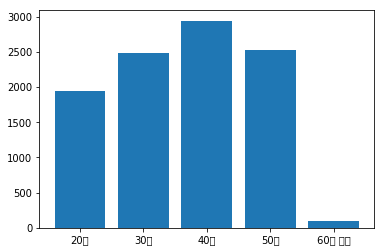

In [57]:
tmp_1 = sorted(df11['age'].unique())
tmp_2 = list()
for category in tmp_1:
    tmp_2.append(len(df11[df11['age'] == category]))
plt.bar(x=tmp_1, height=tmp_2)

<BarContainer object of 5 artists>

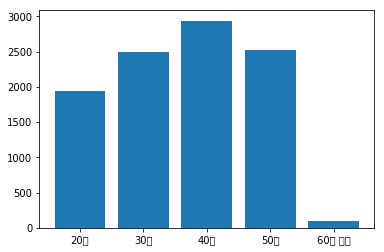

In [58]:
tmp_1 = sorted(df12['age'].unique())
tmp_2 = list()
for category in tmp_1:
    tmp_2.append(len(df12[df12['age'] == category]))
plt.bar(x=tmp_1, height=tmp_2)

<BarContainer object of 5 artists>

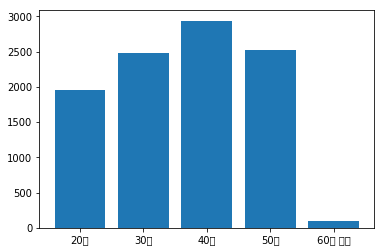

In [59]:
tmp_1 = sorted(df21['age'].unique())
tmp_2 = list()
for category in tmp_1:
    tmp_2.append(len(df21[df21['age'] == category]))
plt.bar(x=tmp_1, height=tmp_2)

<BarContainer object of 5 artists>

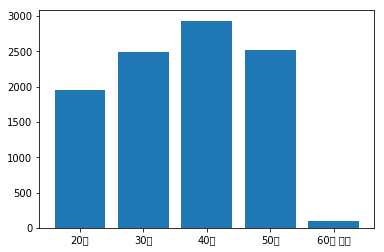

In [60]:
tmp_1 = sorted(df22['age'].unique())
tmp_2 = list()
for category in tmp_1:
    tmp_2.append(len(df22[df22['age'] == category]))
plt.bar(x=tmp_1, height=tmp_2)

# 범주형 변수 -> 수치형 변수로 바꾸기 (주소는 메일의 등급표를 확인할 것)

In [61]:
df11_dummies = pd.get_dummies(df11)
df12_dummies = pd.get_dummies(df12)
df21_dummies = pd.get_dummies(df21)
df22_dummies = pd.get_dummies(df22)

# 범주형 데이터 수치형 데이터 (One-hot encoding)완료, 대부분의 범주형데이터는 Nominal이며, area_grade는 순서가 있지만 이를 실제 수치로 보기보다는 범주를 나누는데 사용하므로 one-hot을 해도 무방할 것으로 생각함

# 여기까지 주말까지 과제

In [67]:
df11.to_csv('df11.csv', index = False)
df12.to_csv('df12.csv', index = False)
df21.to_csv('df21.csv', index = False)
df22.to_csv('df22.csv', index = False)

# SALES 데이터에 대한 분석 시작

In [62]:
df_now = df_list[SALES]
df_now.head()

,Unnamed: 0,date,gender,age,job,marital,province,city,purchase,amount
0,0,2016-05-01,FEMALE,30대,임시직,SINGLE,충청도,청주시,"['D', 'F', 'D', 'G']",100
1,1,2016-05-01,FEMALE,30대,변호사,MARREID,서울시,양천구,"['C', 'G', 'E']",60
2,2,2016-05-01,MALE,60대 이상,회사직원,SINGLE,부산시,연제구,"['B', 'F']",30
3,3,2016-05-01,FEMALE,40대,중소기업직원,MARREID,서울시,양천구,['C'],15
4,4,2016-05-01,FEMALE,50대,의사,MARREID,경상도,거제시,"['G', 'A', 'B']",75


In [63]:
df_now['purchase_'] = df_now['purchase'].apply((lambda x: x[2:-2].split("', '")))
df_now.head()

,Unnamed: 0,date,gender,age,job,marital,province,city,purchase,amount,purchase_
0,0,2016-05-01,FEMALE,30대,임시직,SINGLE,충청도,청주시,"['D', 'F', 'D', 'G']",100,"[D, F, D, G]"
1,1,2016-05-01,FEMALE,30대,변호사,MARREID,서울시,양천구,"['C', 'G', 'E']",60,"[C, G, E]"
2,2,2016-05-01,MALE,60대 이상,회사직원,SINGLE,부산시,연제구,"['B', 'F']",30,"[B, F]"
3,3,2016-05-01,FEMALE,40대,중소기업직원,MARREID,서울시,양천구,['C'],15,[C]
4,4,2016-05-01,FEMALE,50대,의사,MARREID,경상도,거제시,"['G', 'A', 'B']",75,"[G, A, B]"


In [64]:
wine_price = {
    'A':35,
    'B':10,
    'C':15,
    'D':25,
    'E':15,
    'F':20,
    'G':30,
    'H':10,
}

df_now['actual_amount'] = df_now['purchase_'].apply((lambda x: sum(list(map((lambda k: wine_price[k]), x)))))

In [65]:
df_now[df_now['amount'] != df_now['actual_amount']]

,Unnamed: 0,date,gender,age,job,marital,province,city,purchase,amount,purchase_,actual_amount


# df_now의 amount가 잘못 입력된 이상치는 없음

In [66]:
for column in df_now.columns:
    print('=' * 80)
    print(f'Report - {column}')
    print(f'Empty entries: {len(df_now[df_now.isnull()[column] == True])}')
    try: print(f'unique values: {df_now[column].unique()[:19] if len(df_now[column].unique()) >= 20 else df_now[column].unique() }')
    except: print(f'unique values: unprintable')

Report - Unnamed: 0
Empty entries: 0
unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Report - date
Empty entries: 0
unique values: ['2016-05-01' '2016-05-02' '2016-05-03' '2016-05-04' '2016-05-05'
 '2016-05-06' '2016-05-07' '2016-05-08' '2016-05-09' '2016-05-10'
 '2016-05-11' '2016-05-12' '2016-05-13' '2016-05-14' '2016-05-15'
 '2016-05-16' '2016-05-17' '2016-05-18' '2016-05-19']
Report - gender
Empty entries: 0
unique values: ['FEMALE' 'MALE' 'UNKNOW']
Report - age
Empty entries: 0
unique values: ['30대' '60대 이상' '40대' '50대' '20대' '미상']
Report - job
Empty entries: 0
unique values: ['임시직' '변호사' '회사직원' '중소기업직원' '의사' '자영업' '벤처직원' '기자' '학생' '연구원' '교수' '공무원'
 '미상']
Report - marital
Empty entries: 0
unique values: ['SINGLE' 'MARREID' 'UNKNOWN']
Report - province
Empty entries: 0
unique values: ['충청도' '서울시' '부산시' '경상도' '전라도' '경기도']
Report - city
Empty entries: 0
unique values: ['청주시' '양천구' '연제구' '거제시' '광양시' '함안군' '강남구' '가평군' '해운대구' '포천시' '포항시 북구'
 '포항시 남구' '사하구' '강동구

# SALES는 이상치를 채우지 않는다. (추적이 불가능하기 때문)